# Milestone 2: Advanced Data Analysis and Feature Engineering

## Imports:

In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import chi2, f_classif, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression


### 1) Load the data:

In [16]:
df = pd.read_csv(r"E:\Customer-Churn-Prediction-and-Analysis\Data\cleaned_churn_data.csv")
df.head()

id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15              True                        False             11.95   
1  18             False                        False              8.22   
2  23              True                        False              8.91   
3  27             False                        False              6.87   
4  34             False                        False              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                0.00                      0           0.0   
2        16                0.00                      0          13.7   
3        21                0.00                      1           0.0   
4         0                0.00                      0           0.0   

   upload_avg  download_over_limit  churn  has_contract  
0         2.3                    0  False          True  
1         0.0                    0   True         False  
2         0.9                    0   True         False  
3         0.0                    0   True         False  
4         0.0                    0   True         False

- ## 2) Removes spaces & missing data
    - #### Converts booleans (True/False) to 0/1


In [17]:
df.columns = df.columns.str.strip()
df.dropna(inplace=True)
bool_cols = ['is_tv_subscriber', 'is_movie_package_subscriber', 'has_contract', 'churn']
df[bool_cols] = df[bool_cols].astype(int)
df.head()

id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                0.00                      0           0.0   
2        16                0.00                      0          13.7   
3        21                0.00                      1           0.0   
4         0                0.00                      0           0.0   

   upload_avg  download_over_limit  churn  has_contract  
0         2.3                    0      0             1  
1         0.0                    0      1             0  
2         0.9                    0      1             0  
3         0.0                    0      1             0  
4         0.0                    0      1             0

## 3) Advanced Data Analysis

C:\Users\almasry net\AppData\Local\Temp\ipykernel_6660\1480680112.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




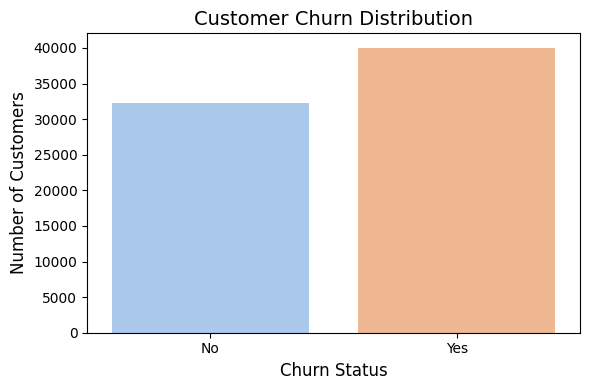

In [18]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='pastel')
plt.title("Customer Churn Distribution", fontsize=14)
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

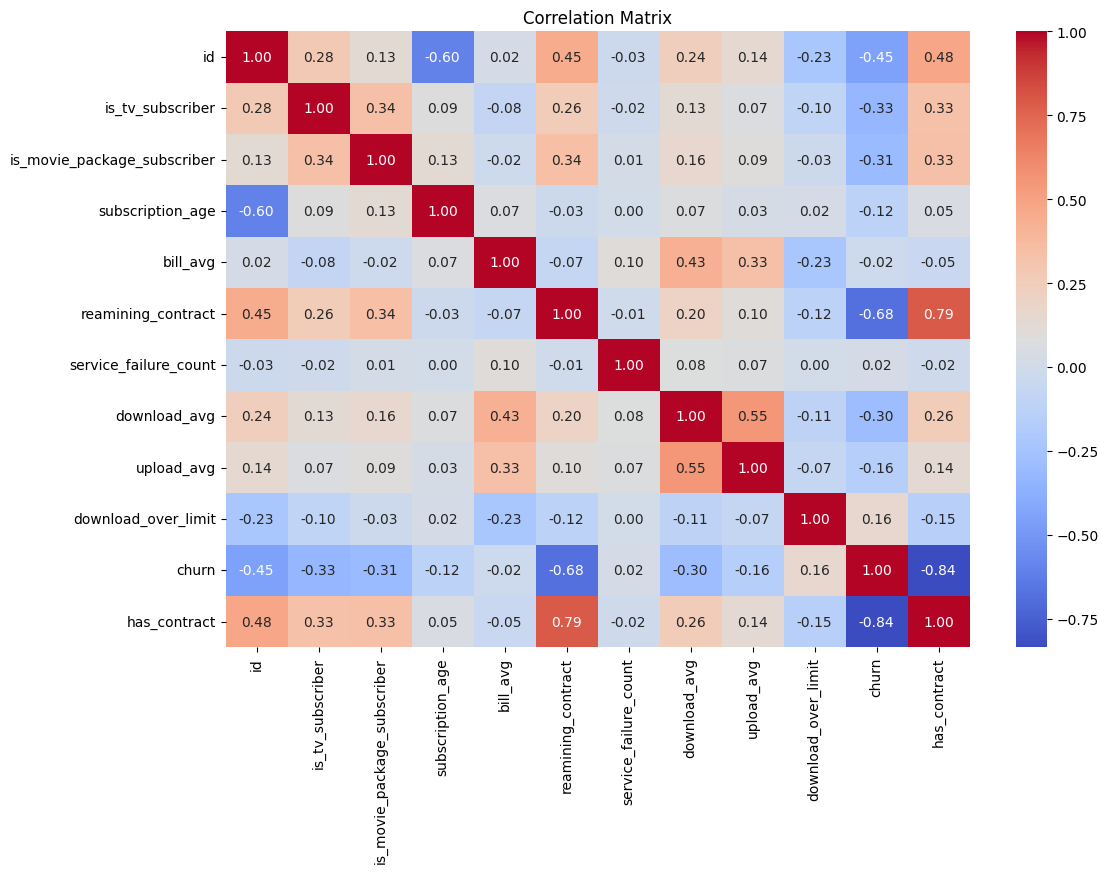

In [19]:
#  Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
# Chi-squared test for categorical features
X_cat = df[bool_cols]
y = df['churn']
chi_scores = chi2(X_cat, y)
chi_results = pd.DataFrame({'Feature': X_cat.columns, 'Chi2': chi_scores[0], 'p-value': chi_scores[1]})
print("üîπ Chi-squared Test Results:\n", chi_results.sort_values('Chi2', ascending=False))

üîπ Chi-squared Test Results:
                        Feature          Chi2  p-value
3                        churn  32224.000000      0.0
2                 has_contract  26480.113802      0.0
1  is_movie_package_subscriber   4537.277652      0.0
0             is_tv_subscriber   1432.804997      0.0


In [21]:
# üîç ANOVA F-test for numerical features
X_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'churn'])
f_values, p_values = f_classif(X_num, y)
anova_df = pd.DataFrame({'Feature': X_num.columns, 'F-Value': f_values, 'p-value': p_values})
print("\nüîπ ANOVA F-Test Results:\n", anova_df.sort_values('F-Value', ascending=False))


üîπ ANOVA F-Test Results:
                        Feature        F-Value        p-value
9                 has_contract  167070.257319   0.000000e+00
4           reamining_contract   62713.303645   0.000000e+00
0             is_tv_subscriber    8687.808425   0.000000e+00
1  is_movie_package_subscriber    7529.395228   0.000000e+00
6                 download_avg    6917.377677   0.000000e+00
7                   upload_avg    1920.227647   0.000000e+00
8          download_over_limit    1858.048461   0.000000e+00
2             subscription_age    1099.969442  2.129323e-239
5        service_failure_count      33.655440   6.606404e-09
3                     bill_avg      32.063003   1.498171e-08


In [22]:
#  Recursive Feature Elimination
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_num, y)
print("\nüîπ Top RFE Features:")
for i, feature in enumerate(X_num.columns):
    if rfe.support_[i]:
        print(f"- {feature}")


üîπ Top RFE Features:
- is_tv_subscriber
- subscription_age
- reamining_contract
- download_over_limit
- has_contract


##  4. Feature Engineering


In [23]:
# New feature: Total data usage (download + upload)
df['total_usage'] = df['download_avg'] + df['upload_avg']

# New feature: Customer lifetime value (bill * age)
df['customer_lifetime_value'] = df['bill_avg'] * df['subscription_age']

# Normalize selected features
scaler = MinMaxScaler()
scaled_cols = ['subscription_age', 'bill_avg', 'reamining_contract', 'download_avg', 'upload_avg']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df.head()


id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0          0.933697   
1  18                 0                            0          0.642746   
2  23                 1                            0          0.696568   
3  27                 0                            0          0.537441   
4  34                 0                            0          0.500000   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0  0.061576            0.047945                      0      0.001903   
1  0.000000            0.000000                      0      0.000000   
2  0.039409            0.000000                      0      0.003103   
3  0.051724            0.000000                      1      0.000000   
4  0.000000            0.000000                      0      0.000000   

   upload_avg  download_over_limit  churn  has_contract  total_usage  \
0    0.005074                    0      0             1         10.7   
1    0.000000                    0      1             0          0.0   
2    0.001985                    0      1             0         14.6   
3    0.000000                    0      1             0          0.0   
4    0.000000                    0      1             0          0.0   

   customer_lifetime_value  
0                   298.75  
1                     0.00  
2                   142.56  
3                   144.27  
4                     0.00

##  5) Visualizations & Dashboards

In [24]:
# Segmentation of churned vs non-churned by contract
fig = px.histogram(df, x="has_contract", color="churn", barmode="group",
                   title="Churn by Contract Status", labels={"has_contract": "Has Contract"})
fig.show()

In [25]:
# Scatter of bill vs. age colored by churn
fig = px.scatter(df, x='subscription_age', y='bill_avg', color='churn',
                 title='Bill vs. Age of Subscription Colored by Churn')
fig.show()

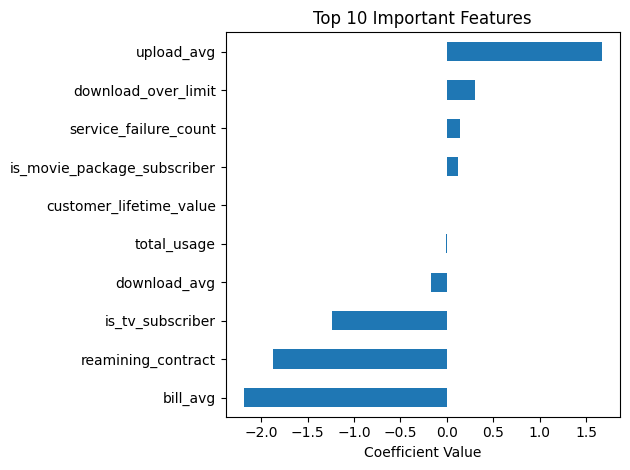

In [26]:
# Feature importance (from logistic regression)
X = df.drop(columns=['id', 'churn'])
y = df['churn']
model.fit(X, y)
importance = pd.Series(model.coef_[0], index=X.columns)
importance.nlargest(10).sort_values().plot(kind='barh', title='Top 10 Important Features')
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()